### Two Manifolds
spudenv env for python3 (not spudenv2)

https://www.datatechnotes.com/2018/12/rnn-example-with-keras-simplernn-in.html

In [139]:
# TO DO:

# x fixed input, sine output. sine generator

# ring and line attractor generator networks. to test two manifold idea. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, SimpleRNN
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN

Using TensorFlow backend.


In [3]:
from keras import backend as K

In [46]:
from mpl_toolkits.mplot3d import Axes3D

#### Generating Sample Dataset

In [121]:
N = 10000    
Tp = 8000    
f=0.02
t=np.arange(0,N)
x=np.sin(f*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.499760
1,0.554508
2,0.257627
3,1.812818
4,0.677045


In [122]:
2*np.pi*1/0.02

314.1592653589793

<IPython.core.display.Javascript object>


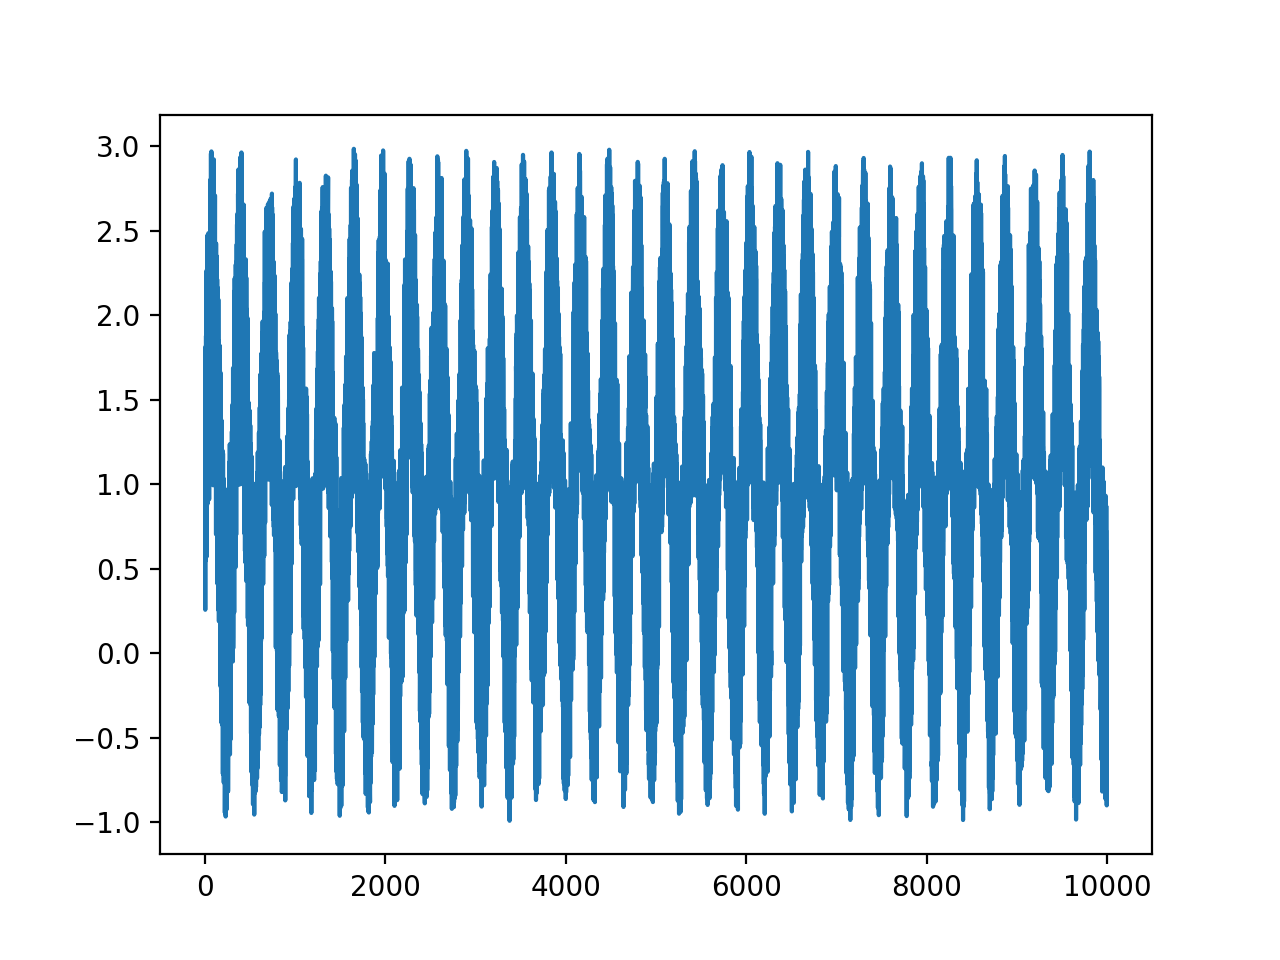

In [123]:
plt.plot(df)
plt.show() 

In [135]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [136]:
test.shape

(2000, 1)

In [137]:
train_input = f*np.ones(train.shape[0])
test_input = f*np.ones(test.shape[0])

<IPython.core.display.Javascript object>


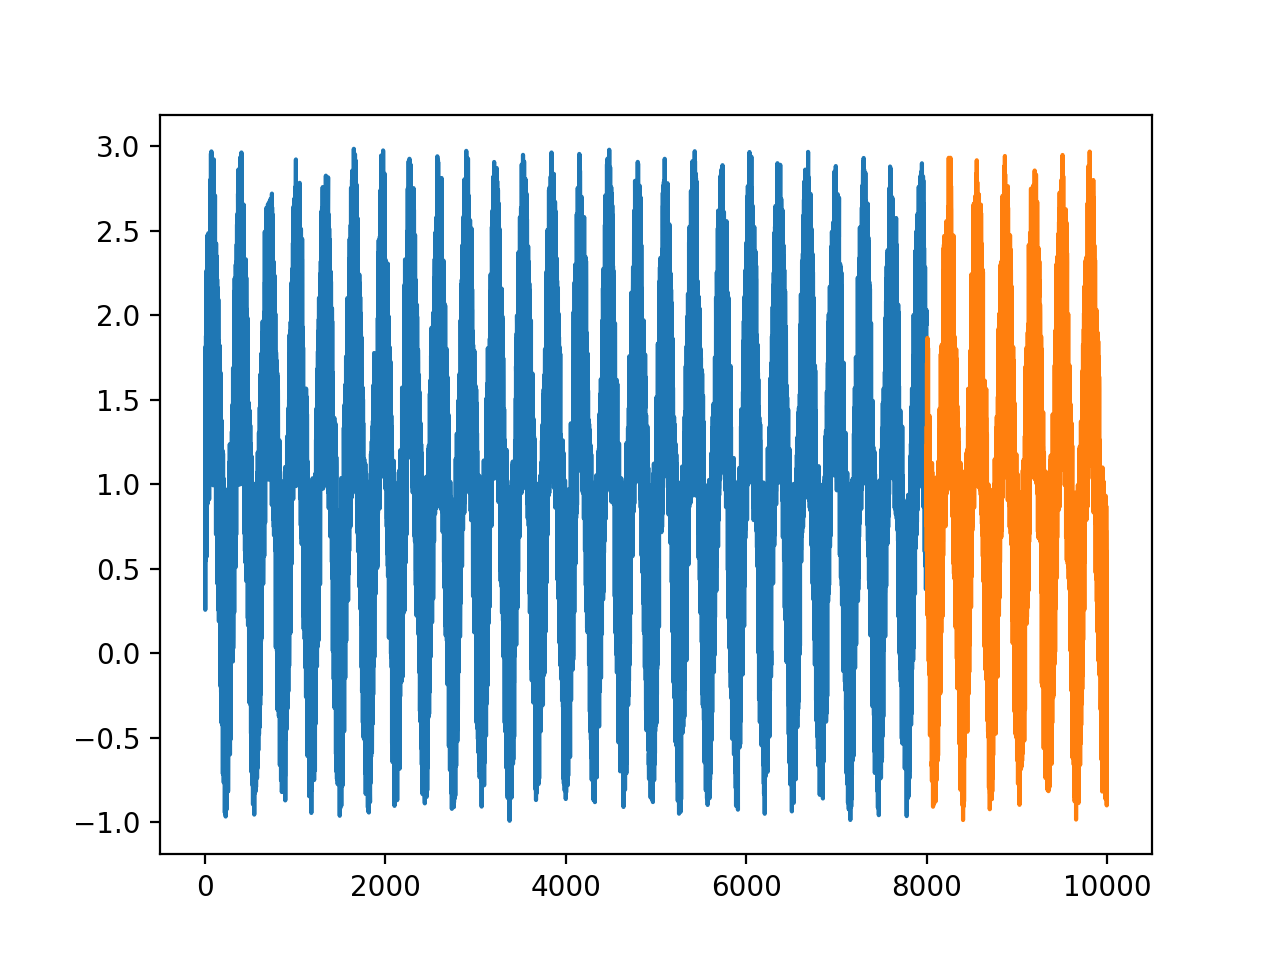

In [138]:
plt.plot(np.arange(Tp),train)
plt.plot(np.arange(Tp,N),test)
plt.show()

In [134]:
step = 3
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [10]:
# convert into dataset matrix
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [11]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(8000, 1, 3)
(8000,)
(2000, 1, 3)
(2000,)


In [14]:
trainX[0]

array([[1.18171223, 0.88658528, 1.42083765]])

In [15]:
trainX[1]

array([[0.88658528, 1.42083765, 0.80945887]])

array([[1.18171223],
       [0.88658528],
       [1.42083765],
       ...,
       [0.78873256],
       [1.34353482],
       [0.393746  ]])

### Building Simple RNN model

In [16]:
# MODEL API

def define_model(length_of_sequences, batch_size = None, stateful = False):
    in_neurons = step
    out_neurons = 1
    hidden_neurons = 32
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_neurons))  

    rnn = SimpleRNN(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN", activation='relu')(inp)

    dens = Dense(out_neurons,name="dense")(rnn)
    model = Model(inputs=[inp],outputs=[dens])
    
    model.compile(loss="mean_squared_error", optimizer="rmsprop")

    
    return(model,(inp,rnn,dens))
## use the default values for batch_size, stateful
model, (inp,rnn,dens) = define_model(length_of_sequences = trainX.shape[1])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 3)              0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 32)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [17]:
w = model.get_weights()

In [18]:
w[0].size

96

In [19]:
hist = model.fit(trainX,trainY, epochs=100, batch_size=32, verbose=2) #batch_size=16
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
 - 0s - loss: 0.4296
Epoch 2/100
 - 0s - loss: 0.4219
Epoch 3/100
 - 0s - loss: 0.4211
Epoch 4/100
 - 0s - loss: 0.4189
Epoch 5/100
 - 0s - loss: 0.4182
Epoch 6/100
 - 0s - loss: 0.4172
Epoch 7/100
 - 0s - loss: 0.4152
Epoch 8/100
 - 0s - loss: 0.4142
Epoch 9/100
 - 0s - loss: 0.4136
Epoch 10/100
 - 0s - loss: 0.4123
Epoch 11/100
 - 0s - loss: 0.4120
Epoch 12/100
 - 0s - loss: 0.4111
Epoch 13/100
 - 0s - loss: 0.4104
Epoch 14/100
 - 0s - loss: 0.4104
Epoch 15/100
 - 0s - loss: 0.4101
Epoch 16/100
 - 0s - loss: 0.4092
Epoch 17/100
 - 0s - loss: 0.4089
Epoch 18/100
 - 0s - loss: 0.4088
Epoch 19/100
 - 0s - loss: 0.4082
Epoch 20/100
 - 0s - loss: 0.4075
Epoch 21/100
 - 0s - loss: 0.4071
Epoch 22/100
 - 0s - loss: 0.4074
Epoch 23/100
 - 0s - loss: 0.4067
Epoch 24/100
 - 0s - loss: 0.4065
Epoch 25/100
 - 0s - loss: 0.4065
Epoch 26/100
 - 0s - loss: 0.4052
Epoch 27/100
 - 0s - loss: 0.4054
Epoch 28/100
 - 0s - loss: 0.4053
Epoch 29/100
 - 0s - loss: 0.4051
Epoch 30/100
 - 0s - lo

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.3977843872308731


In [48]:
%matplotlib notebook

In [189]:
%matplotlib inline

In [21]:
predicted.shape

(10000, 1)

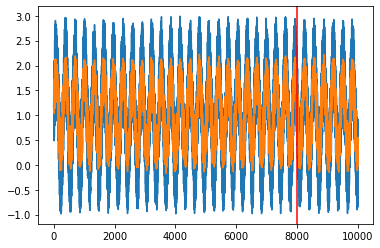

In [23]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted[0:10000])
plt.axvline(df.index[Tp], c="r")
plt.show()

## Visualize the Network

In [61]:
# get states and acrtivations or output for rnn.

# Learn to play with the activations states outputs etc. look how multitask gets dynamics.

# https://medium.com/@plusepsilon/visualizations-of-recurrent-neural-networks-c18f07779d56
# better #https://fairyonice.github.io/Understand-Keras%27s-RNN-behind-the-scenes-with-a-sin-wave-example.html

In [24]:
w = model.get_weights()

In [25]:
print(len(w))
print(w[0].size)

5
96


In [26]:
# RNN model
rnn_model = Model(inputs=[inp],outputs=[rnn])
rnn_model.compile(loss="mean_squared_error", optimizer="rmsprop")
hidden_units = rnn_model.predict(testX).flatten()

In [27]:
hidden_units = rnn_model.predict(testX)

In [30]:
print(hidden_units.shape)

(2000, 32)


<IPython.core.display.Javascript object>


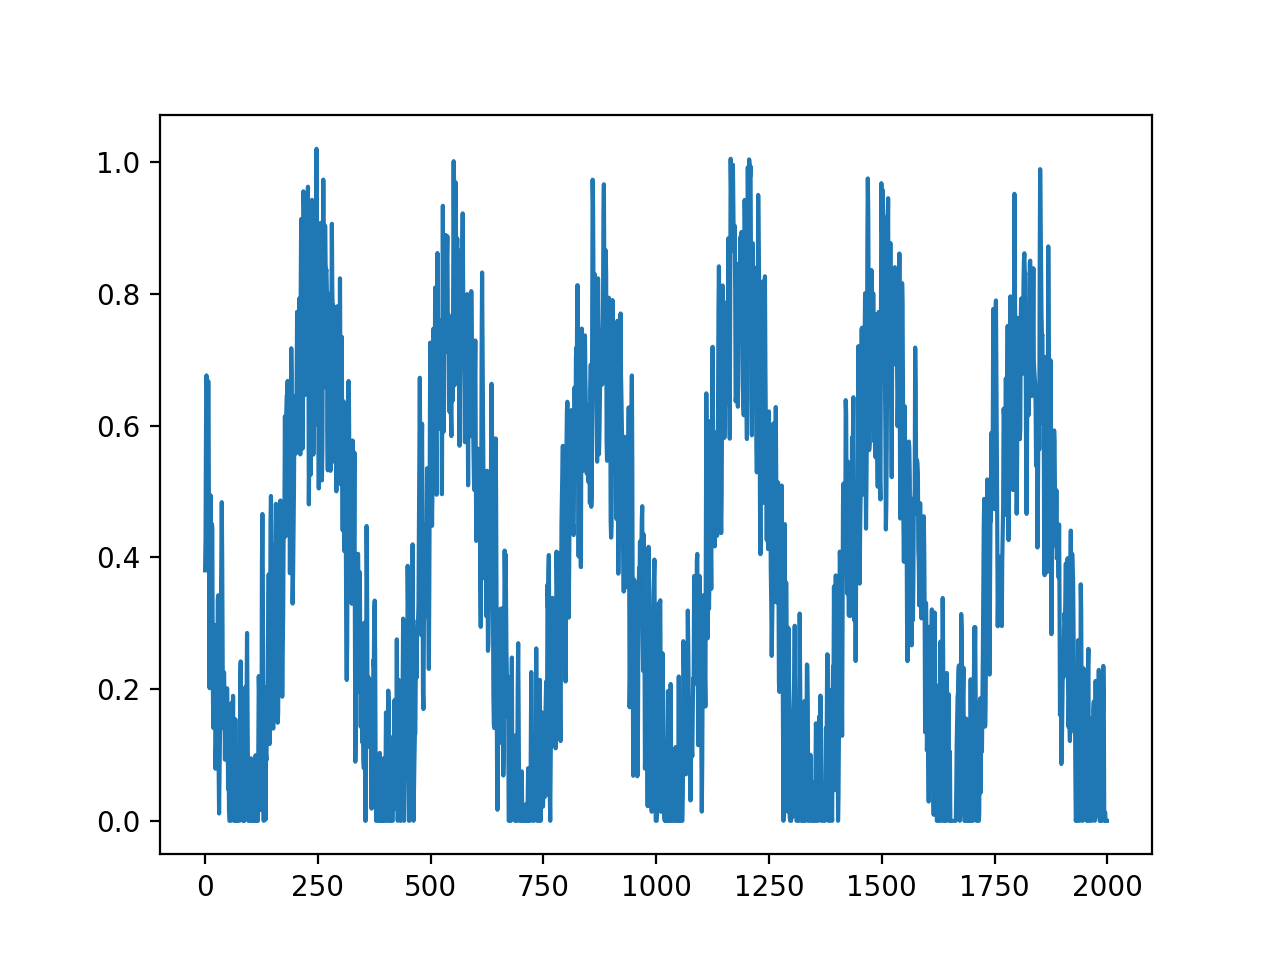

In [106]:
plt.plot(hidden_units[:,14])
plt.show()

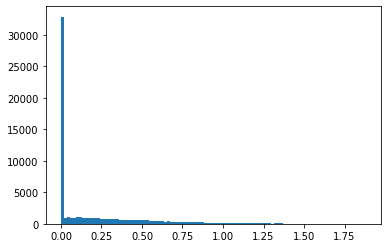

In [29]:
plt.hist(hidden_units.flatten(),100)
plt.show()

In [53]:
husum = hidden_units.mean(axis=0)

In [54]:
husum

array([0.09628881, 0.26114878, 0.50103587, 0.10770473, 0.01615717,
       0.11815375, 0.01114476, 0.35469416, 0.20292212, 0.06645407,
       0.5470013 , 0.12249394, 0.555478  , 0.05845315, 0.37455747,
       0.1405036 , 0.02937531, 0.2569564 , 0.03213579, 0.03754104,
       0.09178681, 0.32090124, 0.0590487 , 0.64215046, 0.02244096,
       0.20864752, 0.1244839 , 0.5277276 , 0.11541501, 0.2818792 ,
       0.05059539, 0.28426123], dtype=float32)

In [75]:
X = np.random.randn(2000,32)

In [78]:
#@ Dimentionality reduction. of 32 neurons
#Xtemp = hidden_units
Xtemp = X
from sklearn.manifold import Isomap
print("High-dim:", hidden_units.shape)
target_dim=3
isomap = Isomap(n_components=target_dim)
hidden_units_reduced = isomap.fit_transform(Xtemp)
print(hidden_units_reduced.shape)

High-dim: (2000, 32)
(2000, 3)


In [ ]:
#@ Dimentionality reduction. of 32 neurons
#Xtemp = hidden_units
Xtemp = X
from sklearn.manifold import Isomap
print("High-dim:", hidden_units.shape)
target_dim=3
isomap = Isomap(n_components=target_dim)
hidden_units_reduced = isomap.fit_transform(Xtemp)
print(hidden_units_reduced.shape)

<IPython.core.display.Javascript object>


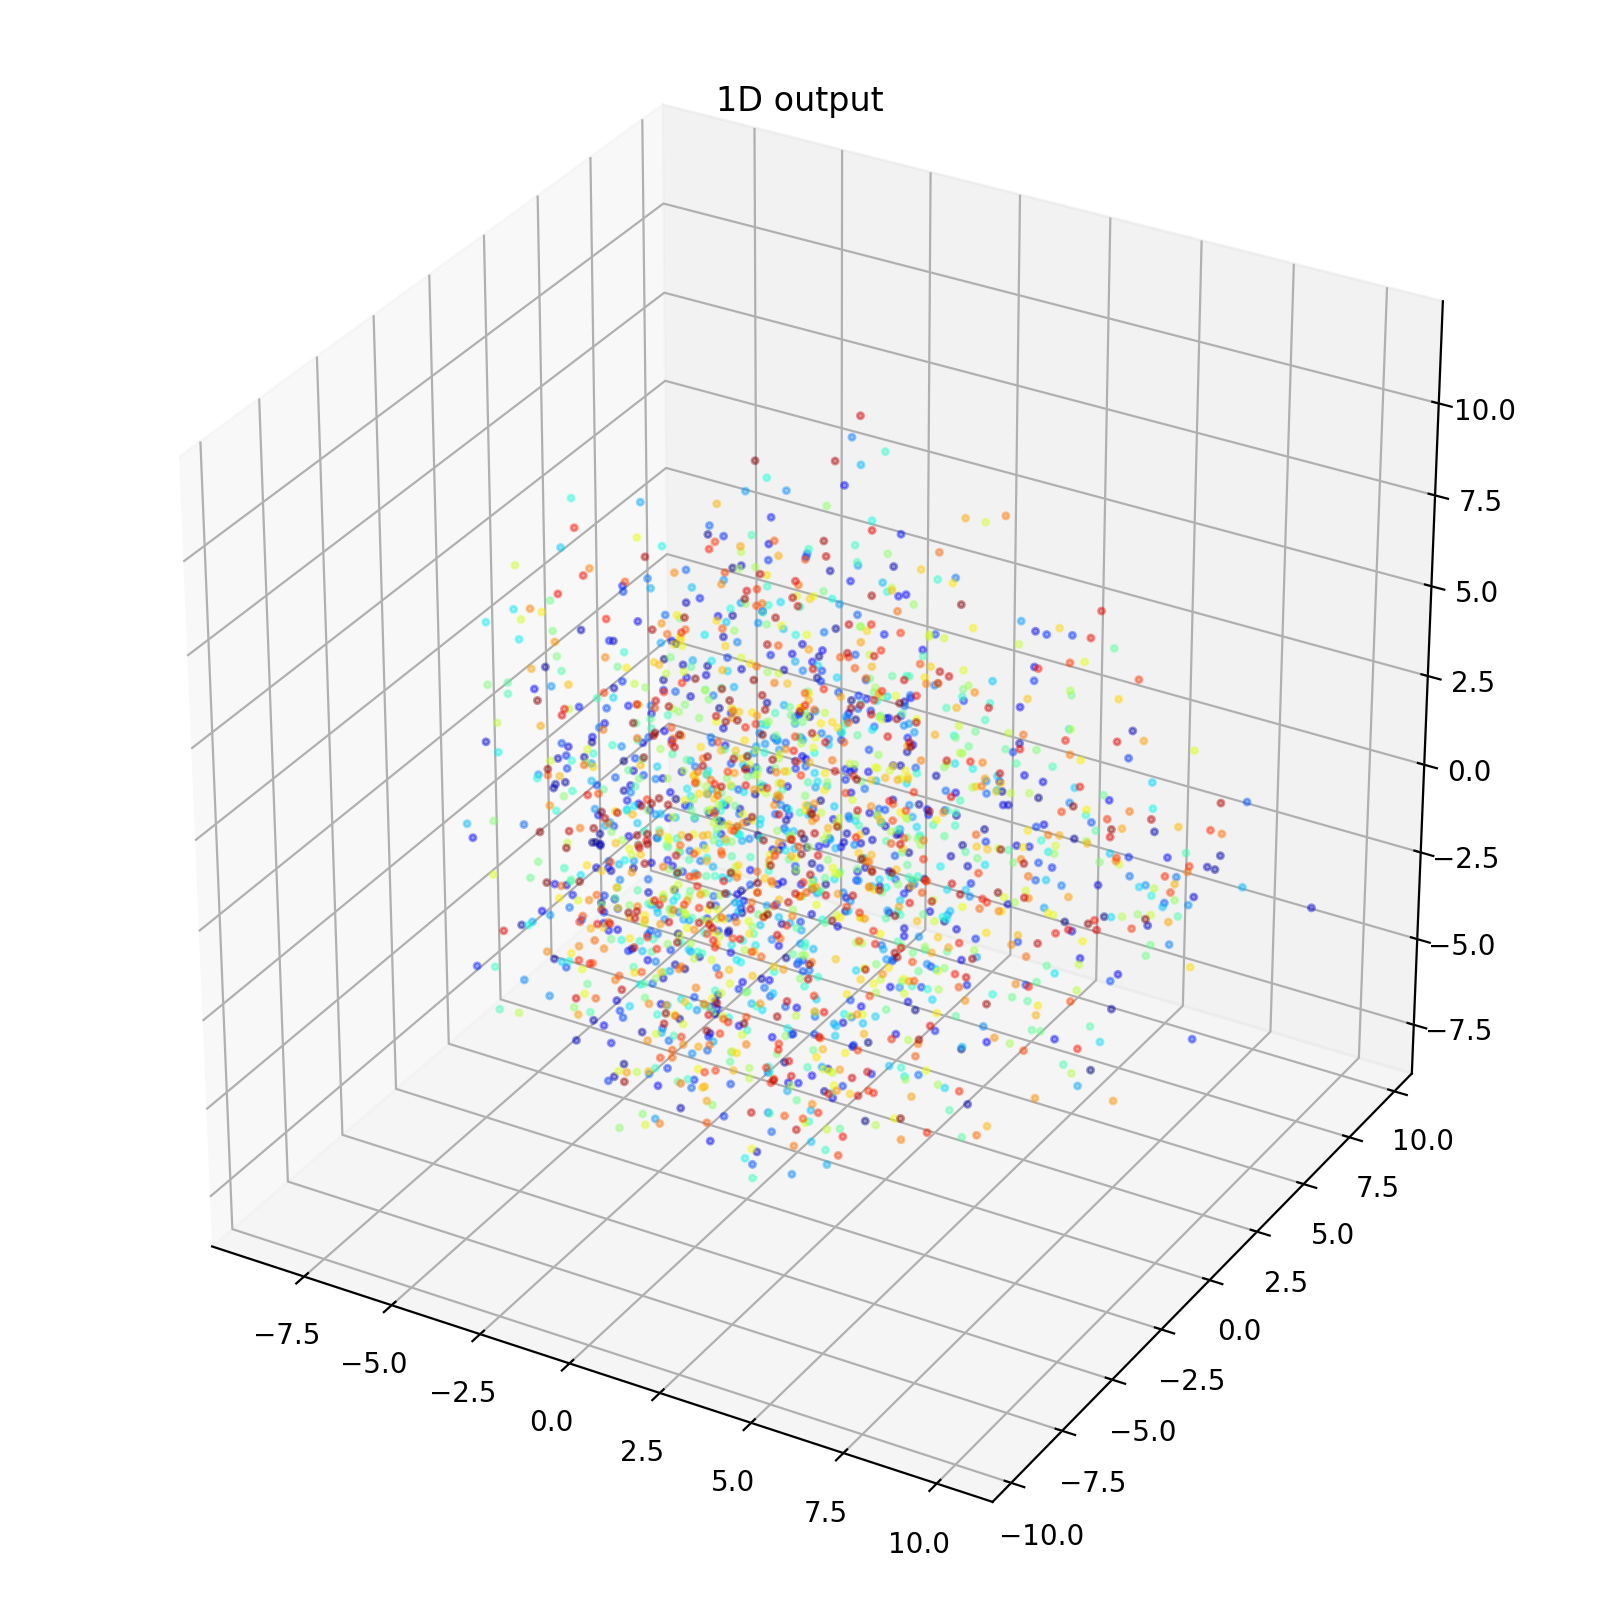

In [79]:
to_save = hidden_units_reduced
to_plot = True
mytime = np.arange(0,hidden_units_reduced.shape[0])

# plotting
if to_plot:
    fig = plt.figure(figsize=(8,8))
    if target_dim == 1:
        ax = fig.add_subplot(111)
        ax.scatter(range(0,15000), to_save, s=5, alpha=0.4, 
            color=cols)
    if target_dim == 2:
        ax = fig.add_subplot(111)
        ax.scatter(to_save[:,0], to_save[:,1], 
            s=10, alpha=0.4, edgecolor='face', c=mytime, cmap='jet')
    if target_dim == 3:
        ax = Axes3D(fig)
        ax.scatter(to_save[:,0], to_save[:,1], to_save[:,2], 
            s=5, alpha=0.4, edgecolor='face', c=mytime, cmap='jet')
    ax.set_title('1D output')
    plt.show()

## Network that follows the angle between two vectors ($-\frac{\pi}{2}, \frac{\pi}{2}$)

In [ ]:
v1 = #unit vector in 3D
v2 = #unit vector in 3D
theta

## Extras

In [108]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
#model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [148]:
def visualize_model(model, include_gradients=False):
    recurrent_layer = model.get_layer(index=0)
    output_layer = model.get_layer(index=1)

    inputs = []
    inputs.extend(model.inputs)

    outputs = []
    outputs.extend(model.outputs)
    outputs.append(recurrent_layer.output)

    if include_gradients:
        loss = K.mean(model.output)  # [batch_size, 1] -> scalar
        grads = K.gradients(loss, recurrent_layer.output)
        grads_norm = grads / (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        outputs.append(grads_norm)

    all_function = K.function(inputs, outputs)
    output_function = K.function([output_layer.input], model.outputs)
    return all_function, output_function